# DBSCAN intro

This algorithm defines clusters as continuous regions of high density.

How it works:

- For each instance, the algorithm counts how many instances are located within a small distance ε (epsilon) from it. This region is called the instance’s ε- neighborhood.

- **If an instance has at least min_samples instances in its ε-neighborhood** (including itself), then it is considered a **core instance**. In other words, core instances are those that are located in dense regions.

- All instances in the neighborhood of a core instance belong to the same cluster. This may include other core instances, therefore a long sequence of neighboring core instances forms a single cluster.

- Any instance that is not a core instance and does not have one in its neighborhood is considered an anomaly.

🔥 This algorithm works well if all the clusters are dense enough, and they are well separated by low-density regions. 

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [2]:
X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.05, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [4]:
dbscan.labels_[:10]

array([ 0,  1,  0, -1,  1,  0,  2,  1,  0,  1])

⚠️ Those labels **-1** are considered **anomalies**

It identified quite a lot of anomalies, plus 7 different clusters. 


Fortunately, if we widen each instance’s neighborhood by increasing **eps to 0.2**, we get the clustering on the right, which looks perfect.

<div>
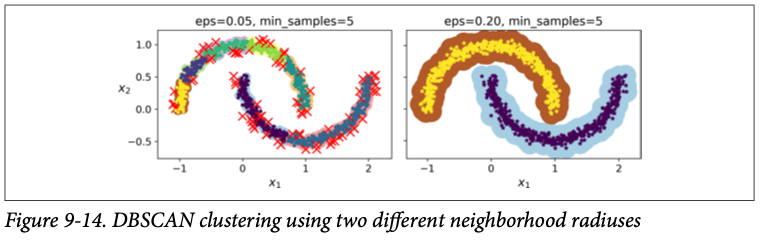
</div>


## Using KNN for predictions

DBSCAN **doesn't** have a direct .predict method, so a KNN can be used for that! 

In [7]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=50, p=2,
           weights='uniform')

In [8]:
# Instances to predict
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])

# predict class of new instances
knn.predict(X_new)

array([3, 1, 0, 4])

In [9]:
# probabilty of predicting to a cluster
knn.predict_proba(X_new)

array([[0.  , 0.24, 0.  , 0.66, 0.  , 0.  , 0.  , 0.  , 0.1 ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.58, 0.3 , 0.  , 0.  , 0.  , 0.12, 0.  , 0.  , 0.  ],
       [0.  , 0.12, 0.  , 0.  , 0.88, 0.  , 0.  , 0.  , 0.  ]])

### Decision boundary

Directly using a KNN doesn't assign anomalies, bur rather a decision boundary. **Because all instances are assigned to a cluster.**

To select outliers, we need a KNeighborsClassifier and set a maximum distance to still be considered part of a cluster

<div>
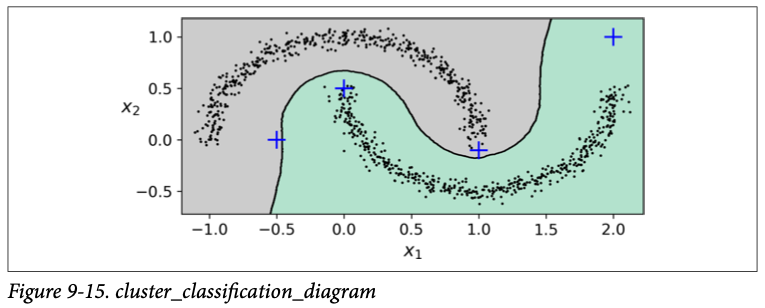
</div>

In [11]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  1,  5, -1])